In [27]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
%matplotlib inline

bigquery_client = bigquery.Client()

events_query = """
        SELECT t0.arrival_time,
               t0.audience_interest,
               t0.audience_range,
               t0.source
        FROM `anomaly-detection-presentation.work_ds.audience_events_data` AS t0;
        """

events_query_job = bigquery_client.query(events_query)

events_df = events_query_job.to_dataframe()

pubsub_events_df = events_df[events_df['source'] == "PUBSUB"]

storage_events_df = events_df[events_df['source'] == "STORAGE"]

outliers_query = """
                    select audience_range,
                           audience_interest
                    from `anomaly-detection-presentation.work_ds.outliers`;
                    """

outliers_query_job = bigquery_client.query(outliers_query)

outliers_df = outliers_query_job.to_dataframe()

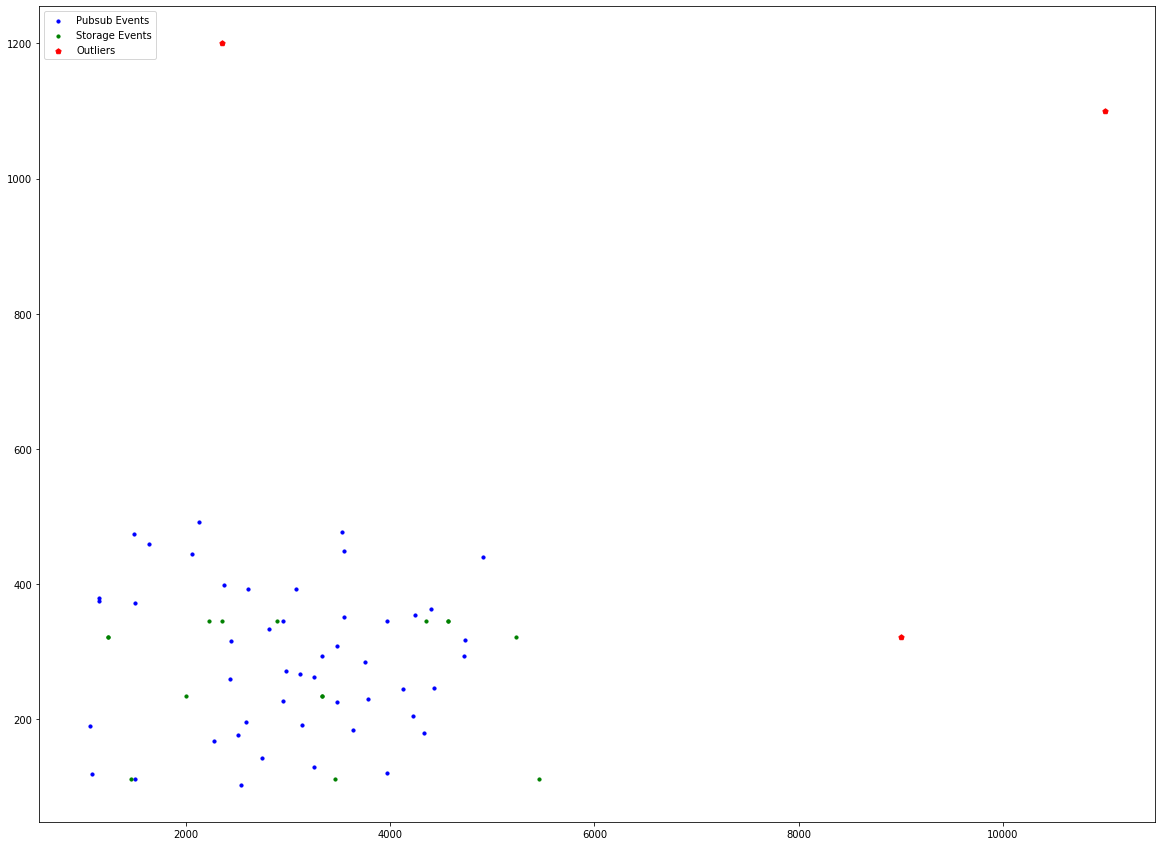

In [11]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
ax.scatter(x=pubsub_events_df["audience_interest"],
           y=pubsub_events_df["audience_range"],
           s=10,
           c='b',
           label='Pubsub Events')

ax.scatter(x=storage_events_df["audience_interest"],
           y=storage_events_df["audience_range"],
           s=10,
           marker='o',
           c='g',
           label='Storage Events')


ax.scatter(x=outliers_df["audience_interest"],
           y=outliers_df["audience_range"],
           s=30,
           marker='p',
           c='r',
           label='Outliers')

plt.legend(loc='upper left')
plt.show()

